Introduction to Artificial Intelligence - TP2 - April 19th 2018 
--

At the end of this session, you will be able to : 
- Perform basic unsupervised learning tasks using sklearn
- Apply unsupervised learning on PyRat datasets 

In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,MiniBatchDictionaryLearning,DictionaryLearning

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)


# Digits dataset

For this TP we are going to be using the DIGITS dataset. The first thing we are going to do is load the dataset. 

As this is <b>unsupervised</b> we will mostly ignore y (it will only be used for visualization).

Load the model

In [2]:
x_digits,y_digits = load_digits(n_class=10,return_X_y=True)

Visualize some examples

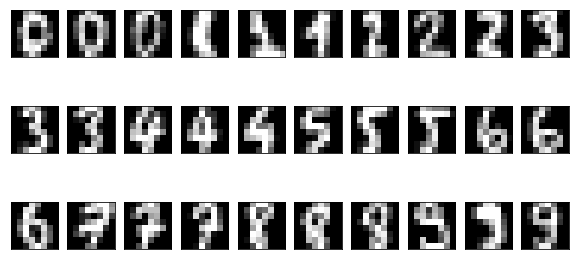

In [3]:
fig = plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(3,10,3*i+1)
    
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.subplot(3,10,3*i+2)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,3*i+3)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

Split the dataset

# K-means
Using sklearn we are going to perform K-means clustering with $10$ clusters. As we did in the last TP we will instantiate an object of the class [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), with n_clusters=10 and random_state=0(so that you results are consistent with ours).

You then should fit the model to the training data (without passing the y as this is a nonsupervised model).

In [4]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(x_digits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Now we are going to visualize the centroids of the $10$ clusters. First we have to get the center of each cluster. 

This will be done by using the attribute cluster\_centers\_ from the object.

In [5]:
### CELL TO COMPLETE, put the cluster centers in variable centroids
centroids = kmeans.cluster_centers_

We will now plot the clusters

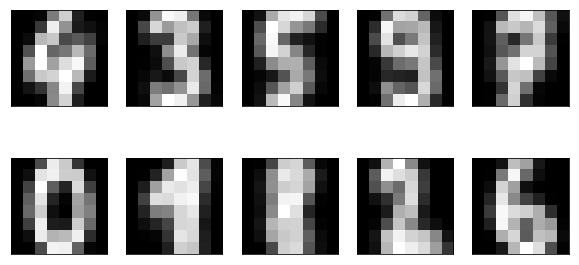

In [6]:
fig = plt.figure(figsize=(10,5))

for i,curcen in enumerate(centroids):
    
    plt.subplot(2,5,i+1)
    im_cen = curcen.reshape((8,8))
    plt.imshow(im_cen,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

We are now going to take a look in our reconstructions using our KMeans model.

First we take a sample from each class

In [7]:
### Pick a few random examples 
whichex = np.random.randint(low=0,high=100,size=1) 

X_samp = np.concatenate([x_digits[y_digits==i][whichex] for i in range(10)])

X_quant = kmeans.transform(X_samp)

labels = np.argmin(X_quant,axis=1)

In [11]:
print(X_quant.shape,labels.shape)

(10, 10) (10,)


In [33]:
for i,label in enumerate(labels):
    print(X_quant[i][label])

[[34.21116107 43.55619856 44.31004737 36.01651621 43.45357269 23.38272344
  39.61395034 39.88892122 46.01421928 35.52314787]
 [39.59729423 43.71037609 49.36153873 44.82880146 43.3116878  53.05486589
  22.97096127 37.23083352 51.73078474 49.46242409]
 [48.13090758 40.42733859 38.41705651 39.59117882 46.17305322 48.37444523
  51.0670426  29.86489161 21.62696276 39.68978017]
 [52.45037746 28.99383439 42.84408008 35.6555387  37.72896918 43.86849089
  44.84564336 49.83814124 49.26766344 57.42088271]
 [27.8365483  52.73449084 46.33976248 50.58107788 44.11986507 53.11006618
  42.41119553 34.0553798  50.04329358 39.64282249]
 [48.22056427 44.63813266 19.82366297 43.01847789 40.88391533 48.51864609
  53.38495997 40.02790501 40.7597116  47.85168904]
 [37.19559081 48.21996641 42.33556143 42.37949315 49.67534765 38.2449883
  51.20284883 39.5440663  40.06066583 16.68399152]
 [42.61405588 50.76030282 44.91727403 50.68819823 36.97965025 56.53256165
  52.57775782 38.32859759 42.93689494 48.98546063]
 

In [36]:
### CELL TO COMPLETE use the transform method from the kmeans object and the argmin method from class numpy
### to generate an array containing the closest centroid to the samples 
### and another array to store the error of reconstructing the samples 

X_errors = X_quant
closest_centroids = centroids[np.argmin(X_errors,axis=1)] #Array containing the closest centroid (argmin of error) to the samples
best_errors =  np.min(X_errors,axis=1) #Array containing the minimal error for each sample
print(best_errors)

[23.38272344 22.97096127 21.62696276 28.99383439 27.8365483  19.82366297
 16.68399152 36.97965025 25.98559286 22.60012035]


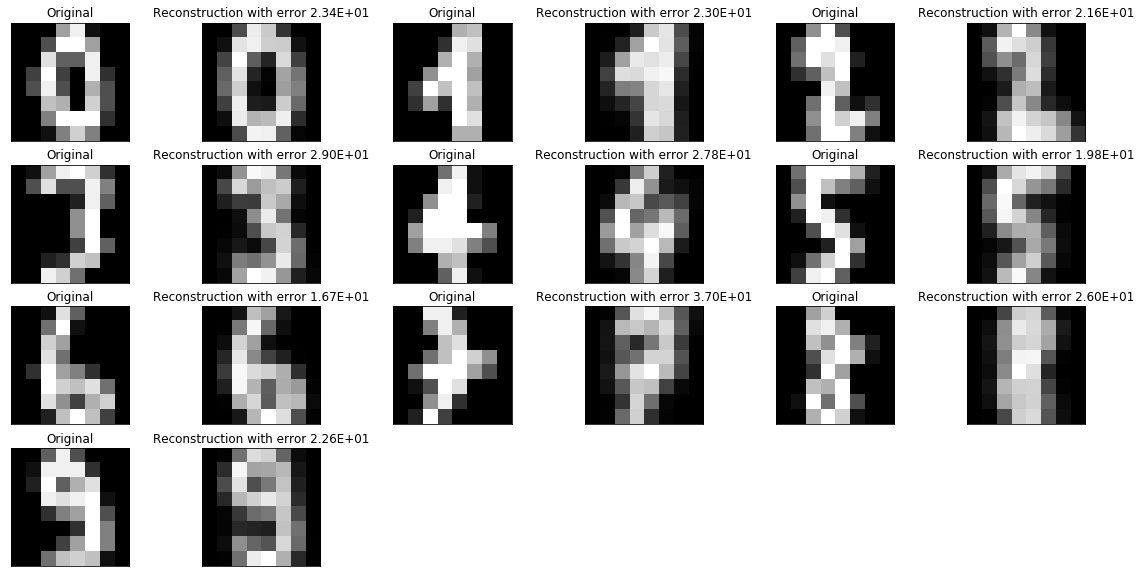

In [37]:
plt.figure(figsize=(20,10))
for i,(im,im_cen,error) in enumerate(zip(X_samp,closest_centroids,best_errors)):
        
    plt.subplot(4,6,1+2*i)
    plt.imshow(im.reshape(8,8),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Original")
    
    plt.subplot(4,6,2+2*i)
    plt.imshow(im_cen.reshape(8,8),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Reconstruction with error %.2E"%error)


Visualize the elbow method with inertia, by generating KMeans with clusters ranging from 1 to 99, using random state = 0. Inertia is stored in [inertia\_](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

100%|██████████| 99/99 [01:05<00:00,  1.10s/it]


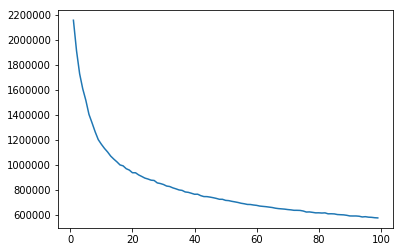

In [39]:
import tqdm
inertias = []
nclust = range(1,100)
### CELL TO COMPLETE, generate a KMeans model with varying n_clusters, fit it to the data 
### and add its inertia to the inertia list
for i in tqdm.tqdm(nclust):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_digits)
    inertias.append(kmeans.inertia_)
plt.plot(nclust,inertias)





Sparse Dictionary Learning  on Digits
--

We are now going to pass to dictionary learning. The first thing is to generate a model using [MiniBatchDictionaryLearning](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html). MiniBatch here means that the method is trained using only a part of the dataset at each time, which helps immensely with the scaling of the method to bigger and wider datasets, but does not guarantee a performance as good as the normal method (where the method see all the dataset at the same time).

Use n_components=$16$, random_state=$0$ and verbose = $10$ to instantiate your object. 

The method [fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html#sklearn.decomposition.MiniBatchDictionaryLearning.fit_transform) is more useful than fit in this case, as it returns the code generated by the dictionary.

In [40]:

dictlearn = MiniBatchDictionaryLearning(n_components=16, random_state = 0, verbose = 10)
code = dictlearn.fit_transform(x_digits)

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  10 (elapsed time:   0s,  0.0mn)
Iteration  20 (elapsed time:   0s,  0.0mn)
Iteration  30 (elapsed time:   0s,  0.0mn)
Iteration  40 (elapsed time:   0s,  0.0mn)
Iteration  50 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  70 (elapsed time:   0s,  0.0mn)
Iteration  80 (elapsed time:   0s,  0.0mn)
Iteration  90 (elapsed time:   0s,  0.0mn)
Iteration  100 (elapsed time:   0s,  0.0mn)
Iteration  110 (elapsed time:   1s,  0.0mn)
Iteration  120 (elapsed time:   1s,  0.0mn)
Iteration  130 (elapsed time:   1s,  0.0mn)
Iteration  140 (elapsed time:   1s,  0.0mn)
Iteration  150 (elapsed time:   1s,  0.0mn)
Iteration  160 (elapsed time:   1s,  0.0mn)
Iteration  170 (elapsed time:   1s,  0.0mn)
Iteration  180 (elapsed time:   1s,  0.0mn)
Iteration  190 (elapsed time:   1s,  0.0mn)
Iteration  200 (elapsed time:   1s,  0.0mn)
Iteration  210 (elapsed time:   1s,  0.0mn)
Iteration  220 (elapsed time:   1s,  0.0mn

We now retrieve each of the components of the dictionary, and plot them so we can visualize the results

(16, 64)


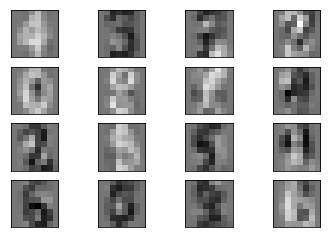

In [44]:
components = dictlearn.components_
fig,axis = plt.subplots(4,4)
for i,d in enumerate(components):
    ax = axis[i//4][i%4]
    ax.imshow(d.reshape((8,8)),cmap=plt.cm.gray,vmin=np.min(components),vmax=np.max(components))
    ax.set_xticks([])
    ax.set_yticks([])

In [46]:
print("V (dictionary); ",components.shape)
print("U (code); ",code.shape)
print("N: {}, K: {}, D:{}".format(code.shape[0], code.shape[1], components.shape[1]))

V (dictionary);  (16, 64)
U (code);  (1797, 16)
N: 1797, K: 16, D:64


Here we can see that the structure of the digits was kept by the components, which means that the digits are always centered and that the rest is a uniform background. 

Now we want to generate some reconstructions, so first we are going to generate some samples

In [47]:
whichex = np.random.randint(low=0,high=100,size=1) 
samples = list()
indexes = list()
for i in range(10):
    index = np.where(y_digits==i)[0][whichex]
    samples.append(x_digits[index])
    indexes.append(index)
X_samp = np.concatenate(samples)
indexes = np.array(indexes)

And now we will use the codes obtained using the dictionary and the indexes used to extract the samples to reconstruct the data by using [np.dot]() function to perform matrix multiplication between the sample code and the components from the dictionary.

In [48]:
### CELL TO COMPLETE, generate the reconstructions array using code, indexes and D
reconstructions = np.dot(code,components)

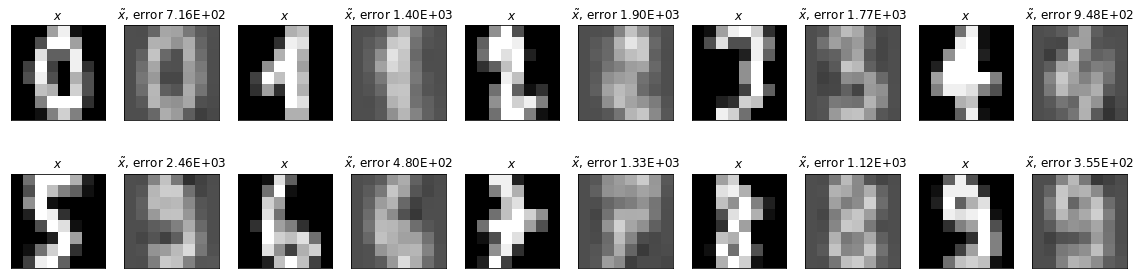

In [49]:
plt.figure(figsize=(20,5))
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,10,plot_index*2+1)

    plt.imshow(digit.reshape((8,8)),cmap=plt.cm.gray,vmin=x_digits.min(),vmax=x_digits.max())
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
        
    plt.subplot(2,10,plot_index*2+2)
    plt.imshow(reconstruction.reshape((8,8)),cmap=plt.cm.gray,vmin=reconstructions.min(),vmax=reconstructions.max())
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-digit)**2)
    plt.title('${\~x}$, error %.2E' % error)

# Visualization of manifold learning

One example of the importance of manifold learning, we train a TSNE model and plot the 2D visualization

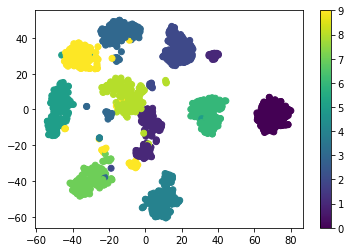

In [56]:
from sklearn.manifold import TSNE
unsup = TSNE(random_state = 0)
examples = unsup.fit_transform(x_digits)
plt.scatter(examples[:,0],examples[:,1],c=y_digits)
plt.colorbar()

Unsupervised learning on pyrat games
--

Now it is your turn. Perform the same analysis we did in the digits dataset on the pyrat dataset you generated for TP1. We are going to be concentrating ourselves only in the games that the python lost (i.e y < 1)

In [65]:
### CELL TO COMPLETE, load the dataset and stock only the games the python lost in x and y

loaded_data = np.load("dataset.npz")
x = loaded_data["x"]
y = loaded_data["y"]
x = x[y < 1]
y = y[y < 1]

Plot a few configurations of the pyrat dataset. In the first TP (TP0) we made a mistake of representing the labyrinth as (15,21) instead of (21,15). Another mistake we made was not inverting the yaxis, which made that not only our labyrinth was not in the correct aspect ratio it was also inverted. 

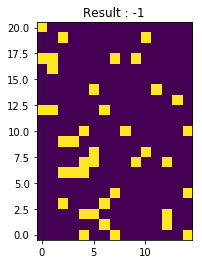

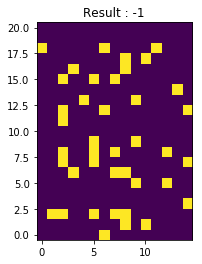

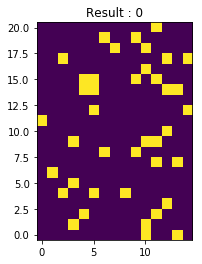

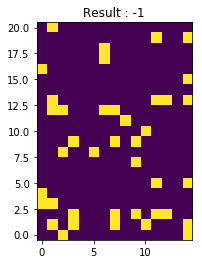

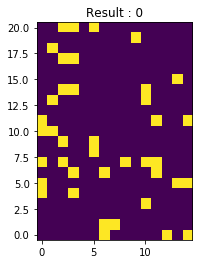

In [67]:
afew = 5
for i in range(afew):
    ind = np.random.randint(x.shape[0])
    plt.imshow(x[ind].reshape((21,15)))
    plt.title('Result : %d' % y[ind])
    plt.gca().invert_yaxis()
    plt.show()

# Mean representation of losses

Do the same experiment as of the end of TP0 by showing the mean representation of the games the python didn't win. This time use the correct values for the aspect ratio of the labyrinth and the correct orientation of the y_axis

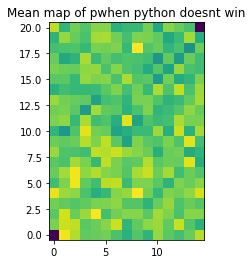

In [76]:
x_reshaped = x.reshape(x.shape[0],21,15)
mean_map = np.mean(x_reshaped,axis=0)

plt.imshow(mean_map)
plt.title('Mean map of pwhen python doesnt win')
plt.gca().invert_yaxis()
plt.show()

Now do a visualization of the cluster centroids and reconstructions as we did with digits. Finally try to find the best k by testing different values of n_clusters 

In [73]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
centroids = kmeans.cluster_centers_
print(centroids.shape)

(2, 315)


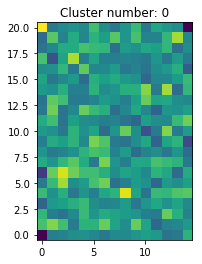

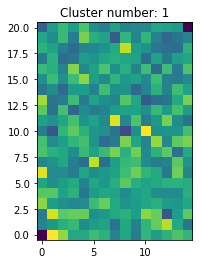

In [74]:
for i,c in enumerate(centroids):
    plt.imshow(c.reshape((21,15)))
    plt.title('Cluster number: %d' % i)
    plt.gca().invert_yaxis()
    plt.show()

100%|██████████| 49/49 [00:16<00:00,  1.84it/s]


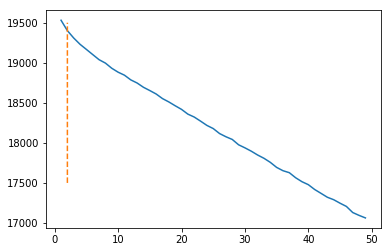

In [93]:
import tqdm
inertias = []
nclust = range(1,50)
for i in tqdm.tqdm(nclust):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
plt.plot(nclust,inertias)
plt.plot(2*np.ones(19500-17500),range(17500,19500),'--')

100%|██████████| 9/9 [00:01<00:00,  5.55it/s]


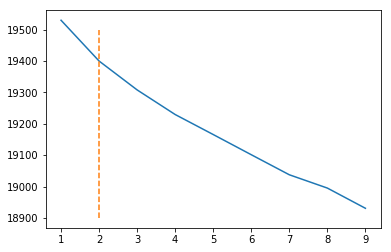

In [89]:
import tqdm
inertias = []
nclust = range(1,10)
for i in tqdm.tqdm(nclust):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
plt.plot(nclust,inertias)
plt.plot(2*np.ones(19500-18900),range(18900,19500),'--')

Dictionary Learning on PyRat Games 
--

Generate a MiniBatchDictionaryLearning model of the pyrat dataset. Show the components, the reconstructions and the errors.

In [94]:
dictlearn = MiniBatchDictionaryLearning(n_components=16, random_state = 0, verbose = 10)
code = dictlearn.fit_transform(x)

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  10 (elapsed time:   0s,  0.0mn)
Iteration  20 (elapsed time:   0s,  0.0mn)
Iteration  30 (elapsed time:   0s,  0.0mn)
Iteration  40 (elapsed time:   0s,  0.0mn)
Iteration  50 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  70 (elapsed time:   0s,  0.0mn)
Iteration  80 (elapsed time:   0s,  0.0mn)
Iteration  90 (elapsed time:   0s,  0.0mn)
Iteration  100 (elapsed time:   0s,  0.0mn)
Iteration  110 (elapsed time:   0s,  0.0mn)
Iteration  120 (elapsed time:   0s,  0.0mn)
Iteration  130 (elapsed time:   0s,  0.0mn)
Iteration  140 (elapsed time:   0s,  0.0mn)
Iteration  150 (elapsed time:   0s,  0.0mn)
Iteration  160 (elapsed time:   0s,  0.0mn)
Iteration  170 (elapsed time:   0s,  0.0mn)
Iteration  180 (elapsed time:   0s,  0.0mn)
Iteration  190 (elapsed time:   0s,  0.0mn)
Iteration  200 (elapsed time:   0s,  0.0mn)
Iteration  210 (elapsed time:   0s,  0.0mn)
Iteration  220 (elapsed time:   0s,  0.0mn

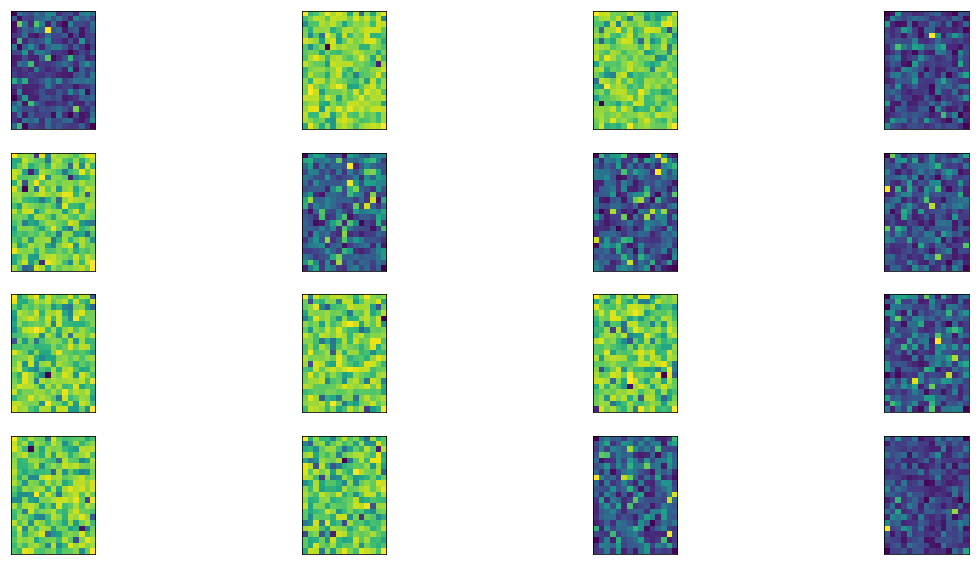

In [101]:
components = dictlearn.components_
fig,axis = plt.subplots(4,4,figsize=(20,10))
for i,d in enumerate(components):
    ax = axis[i//4][i%4]
    ax.imshow(d.reshape((21,15)))
    plt.gca().invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])

In [104]:
whichex = np.random.randint(low=0,high=100,size=1) 
samples = list()
indexes = list()
for i in [-1,0]:
    index = np.where(y==i)[0][whichex]
    samples.append(x[index])
    indexes.append(index)
X_samp = np.concatenate(samples)
indexes = np.array(indexes)
print(X_samp.shape)
print(code.shape,components.shape)
reconstructions = np.dot(code,components)
print(reconstructions.shape)

(2, 315)
(561, 16) (16, 315)
(561, 315)


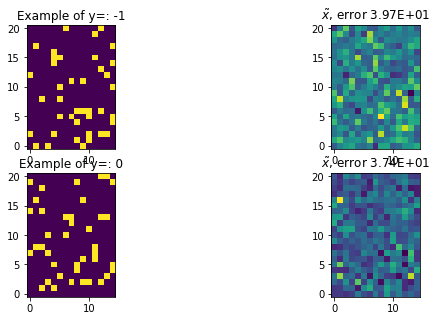

In [111]:
plt.figure(figsize=(10,5))
for plot_index,(mapa,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,2,plot_index*2+1)

    plt.imshow(mapa.reshape((21,15)))
    plt.title('Example of y=: %d' % (plot_index-1))
    plt.gca().invert_yaxis()
    
    
    plt.subplot(2,2,plot_index*2+2)
    plt.imshow(reconstruction.reshape((21,15)))
    plt.gca().invert_yaxis()
    
    
    error = np.sum((reconstruction-mapa)**2)
    plt.title('${\~x}$, error %.2E' % error)


### Now try to analyse the data you have, what are the characteristics that you could find in the games where the python lost? You should now carry on with the analysis on your P2

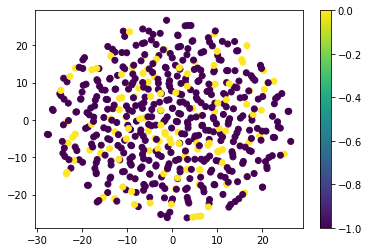

In [112]:
from sklearn.manifold import TSNE
unsup = TSNE(random_state = 0)
examples = unsup.fit_transform(x)
plt.scatter(examples[:,0],examples[:,1],c=y)
plt.colorbar()

In [113]:
loaded_data = np.load("dataset.npz")
x = loaded_data["x"]
y = loaded_data["y"]

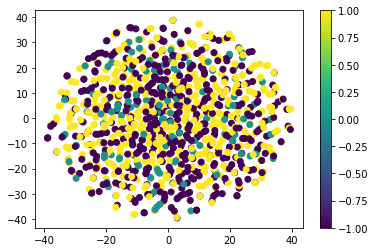

In [114]:
unsup = TSNE(random_state = 0)
examples = unsup.fit_transform(x)
plt.scatter(examples[:,0],examples[:,1],c=y)
plt.colorbar()

We can then conclude that there is no possible low dimension representation of this dataset and, as a consequence, its too difficult to perfrom clustering (the data is highly relationed).